In [27]:
%matplotlib inline

In [28]:
# Importación de librerías
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 #Carga del dataset
#
df = pd.read_csv('C:/Users/nicolás/Desktop/CreditCardData.csv')

 # eploramos los datos
print("Tamaño del dataset:", df.shape)
print("Columnas:\n", df.columns)
print("\nPrimeras filas:")
print(df.head())

#cambiar el valor de las libras a un numero para ser más facil el uso del data frame
# Elimina el símbolo de libra (£) y convierte a float
df['Amount'] = df['Amount'].replace('[£,]', '', regex=True).astype(float)

Tamaño del dataset: (100000, 16)
Columnas:
 Index(['Transaction ID', 'Date', 'Day of Week', 'Time', 'Type of Card',
       'Entry Mode', 'Amount', 'Type of Transaction', 'Merchant Group',
       'Country of Transaction', 'Shipping Address', 'Country of Residence',
       'Gender', 'Age', 'Bank', 'Fraud'],
      dtype='object')

Primeras filas:
  Transaction ID       Date Day of Week  Time Type of Card Entry Mode Amount  \
0      #3577 209  14-Oct-20   Wednesday    19         Visa        Tap     £5   
1      #3039 221  14-Oct-20   Wednesday    17   MasterCard        PIN   £288   
2      #2694 780  14-Oct-20   Wednesday    14         Visa        Tap     £5   
3      #2640 960  13-Oct-20     Tuesday    14         Visa        Tap    £28   
4      #2771 031  13-Oct-20     Tuesday    23         Visa        CVC    £91   

  Type of Transaction Merchant Group Country of Transaction Shipping Address  \
0                 POS  Entertainment         United Kingdom   United Kingdom   
1            

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   float64
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [30]:
# valores de si hay valores nulos
tiene_valores_faltantes = df.isnull().any().any()
print(f"¿Hay valores faltantes en la base de datos? {tiene_valores_faltantes}")
valores_faltantes_por_columna = df.isnull().any()
print(valores_faltantes_por_columna)
matriz_valores_faltantes = df.isnull()


¿Hay valores faltantes en la base de datos? True
Transaction ID            False
Date                      False
Day of Week               False
Time                      False
Type of Card              False
Entry Mode                False
Amount                     True
Type of Transaction       False
Merchant Group             True
Country of Transaction    False
Shipping Address           True
Country of Residence      False
Gender                     True
Age                       False
Bank                      False
Fraud                     False
dtype: bool


In [31]:
col_nulos= df.columns[df.isnull().any()]

# Aplicar imputación:

for col in col_nulos:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(np.nan)
    else:
        df[col] = df[col].fillna(0)

# Verificar que ya no haya valores nulos en columnas numéricas
rectificar = df[col_nulos].isnull().sum()

In [32]:
rectificar

Amount               0
Merchant Group      10
Shipping Address     5
Gender               4
dtype: int64

In [33]:
# valores de si hay valores nulos
tiene_valores_faltantes = df.isnull().any().any()
print(f"¿Hay valores faltantes en la base de datos? {tiene_valores_faltantes}")
valores_faltantes_por_columna = df.isnull().any()
print(valores_faltantes_por_columna)
matriz_valores_faltantes = df.isnull()

¿Hay valores faltantes en la base de datos? True
Transaction ID            False
Date                      False
Day of Week               False
Time                      False
Type of Card              False
Entry Mode                False
Amount                    False
Type of Transaction       False
Merchant Group             True
Country of Transaction    False
Shipping Address           True
Country of Residence      False
Gender                     True
Age                       False
Bank                      False
Fraud                     False
dtype: bool


In [34]:
df['Merchant Group'].fillna('Missing', inplace=True)
df['Shipping Address'].fillna('Missing', inplace=True)
df['Gender'].fillna('Missing', inplace=True)

C:\Users\nicolás\AppData\Local\Temp\ipykernel_9980\3507343748.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Merchant Group'].fillna('Missing', inplace=True)
C:\Users\nicolás\AppData\Local\Temp\ipykernel_9980\3507343748.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [35]:
# valores de si hay valores nulos
tiene_valores_faltantes = df.isnull().any().any()
print(f"¿Hay valores faltantes en la base de datos? {tiene_valores_faltantes}")
valores_faltantes_por_columna = df.isnull().any()
print(valores_faltantes_por_columna)
matriz_valores_faltantes = df.isnull()

¿Hay valores faltantes en la base de datos? False
Transaction ID            False
Date                      False
Day of Week               False
Time                      False
Type of Card              False
Entry Mode                False
Amount                    False
Type of Transaction       False
Merchant Group            False
Country of Transaction    False
Shipping Address          False
Country of Residence      False
Gender                    False
Age                       False
Bank                      False
Fraud                     False
dtype: bool


In [36]:
df.describe()

,Time,Amount,Age,Fraud
count,100000.000000,100000.00000,100000.000000,100000.000000
mean,14.562870,112.57176,44.993770,0.071950
std,5.308195,123.43327,9.948494,0.258406
min,0.000000,0.00000,15.000000,0.000000
25%,10.000000,17.00000,38.200000,0.000000
50%,15.000000,30.00000,44.900000,0.000000
75%,19.000000,208.00000,51.700000,0.000000
max,24.000000,400.00000,86.100000,1.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  100000 non-null  float64
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          100000 non-null  object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        100000 non-null  object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  100000 non-null  object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [38]:
#numericas = ["Time", "Amount", "Age", "Fraud"]

# Vamos a graficar cada columna para entenderla mejor :3
#or col in numericas:
#   plt.figure(figsize=(8, 4))
#    sns.histplot(df[col], kde=False, bins=30)
 #   plt.title(f'Distribución de: {col}')
#   plt.xlabel(col)
#    plt.ylabel('Frecuencia')
#    plt.tight_layout()
#    plt.show()

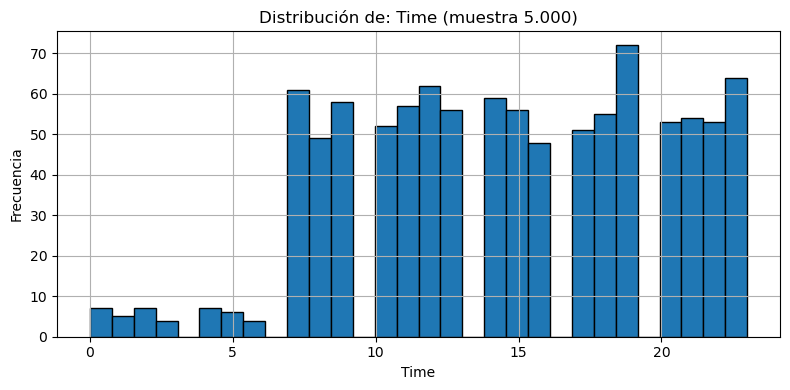

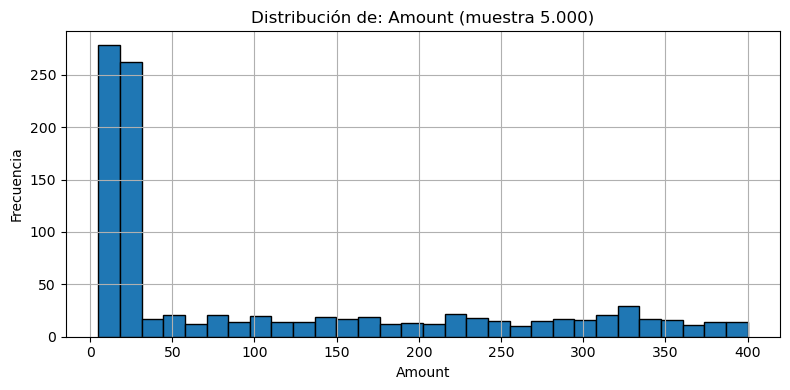

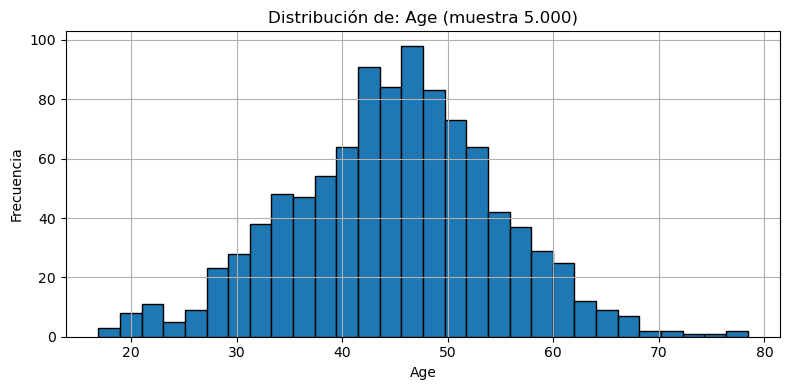

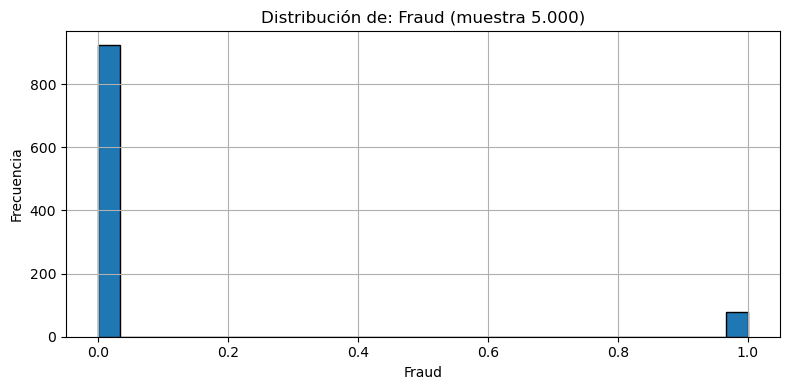

In [ ]:
# Tomar una muestra aleatoria de 10.000 filas pq vscode no se la puede con 100.000 filas
df_sample = df.sample(n=10000, random_state=42)

# Luego graficar
for col in ["Time", "Amount", "Age", "Fraud"]:
    plt.figure(figsize=(8, 4))
    plt.hist(df_sample[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Distribución de: {col} (muestra 5.000)')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()